In [15]:
import numpy as np

In [16]:
import functools
from scipy.stats import spearmanr

def comparator(x,y):
    u = np.random.uniform()
    
    if(u <=p):
        return x-y
    else:
        return y-x    
    
def my_custom_loss_func(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation

In [35]:
def cal(n,state = 1000):
    score = []
    for i in range(state):
        a = np.arange(n)
        b = a.copy()
        np.random.shuffle(b)
        b = sorted(b, key=functools.cmp_to_key(comparator))
        score.append(my_custom_loss_func(a,b))
       
    return np.mean(score)
    

In [36]:
from tqdm import tqdm

In [37]:
results = []
pp = np.arange(0.5,1.1,0.01)
ns = np.arange(100,1100,200)
for n in tqdm(ns):
    res = []
    for p in pp:
        res.append(cal(n))
    results.append(res)

100%|██████████| 5/5 [47:59<00:00, 575.95s/it]


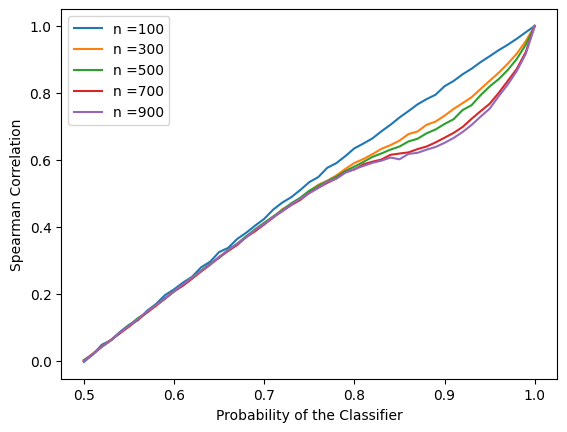

In [41]:
import matplotlib.pyplot as plt
for i,n in enumerate(ns):
    
    plt.plot(pp[:-10],results[i][:-10],label="n =" + str(n))

plt.xlabel("Probability of the Classifier")
plt.ylabel("Spearman Correlation")
plt.legend()
plt.show()